<a href="https://colab.research.google.com/github/tamikataylor/Group-Data-Project/blob/main/DaniilCrossTab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
from scipy.stats import norm,probplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [14]:
from google.colab import files 
uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


In [16]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [17]:
pd.crosstab(df['class'],df['gill-size'],normalize='columns')

gill-size,b,n
class,,
e,0.698503,0.11465
p,0.301497,0.88535


In [18]:
pd.crosstab(df['class'],df['spore-print-color'],normalize='columns')

spore-print-color,b,h,k,n,o,r,u,w,y
class,,,,,,,,,
e,1.0,0.029412,0.880342,0.886179,1.0,0.0,1.0,0.241206,1.0
p,0.0,0.970588,0.119658,0.113821,0.0,1.0,0.0,0.758794,0.0


In [19]:
pd.crosstab(df['class'],df['odor'],normalize='columns')

odor,a,c,f,l,m,n,p,s,y
class,,,,,,,,,
e,1.0,0.0,0.0,1.0,0.0,0.965986,0.0,0.0,0.0
p,0.0,1.0,1.0,0.0,1.0,0.034014,1.0,1.0,1.0


In [21]:
pd.crosstab(df['class'],df['gill-color'],normalize='columns')

gill-color,b,e,g,h,k,n,o,p,r,u,w,y
class,,,,,,,,,,,,
e,0.0,1.0,0.329787,0.278689,0.843137,0.89313,1.0,0.571046,0.0,0.902439,0.795341,0.744186
p,1.0,0.0,0.670213,0.721311,0.156863,0.10687,0.0,0.428954,1.0,0.097561,0.204659,0.255814


In [22]:
pd.crosstab(df['class'],[df['cap-color'],df['cap-shape'],df['cap-surface'],df['odor']],normalize='columns')

cap-color      b                                ...    y                    
cap-shape      b         f                      ...    x                    
cap-surface    s    y    s                   y  ...    s    y               
odor           n    n    f         n         n  ...    l    a    f    l    n
class                                           ...                         
e            0.0  0.0  0.0  0.571429  0.571429  ...  1.0  1.0  0.0  1.0  0.0
p            1.0  1.0  1.0  0.428571  0.428571  ...  0.0  0.0  1.0  0.0  1.0

[2 rows x 193 columns]

In [23]:
Regression = LogisticRegression()


In [24]:
pd.crosstab(df['class'],df['cap-color'],normalize='columns')

cap-color,b,c,e,g,n,p,r,u,w,y
class,,,,,,,,,,
e,0.285714,0.727273,0.416,0.56087,0.553415,0.388889,1.0,1.0,0.692308,0.373134
p,0.714286,0.272727,0.584,0.43913,0.446585,0.611111,0.0,0.0,0.307692,0.626866


In [25]:
Regression.fit(pd.get_dummies(df[['spore-print-color','odor','cap-shape','cap-surface','cap-color','bruises','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring','stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color','ring-number','ring-type','population','habitat']]),df['class'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
Regression.coef_

array([[-1.00781396e-01,  1.02973331e+00, -1.42844984e+00,
        -1.63864896e+00, -1.00781396e-01,  3.66098447e+00,
        -1.54641693e+00,  2.25030894e-01, -1.00781396e-01,
        -2.95570693e+00,  2.87220138e+00,  2.78169802e+00,
        -2.95570693e+00,  3.28325278e-01, -4.18236768e+00,
         2.29495322e+00,  9.08246197e-01,  9.08246197e-01,
         3.39144766e-01,  4.86632525e-01, -7.72769385e-02,
        -1.52517561e-02, -5.52042960e-01, -1.81316881e-01,
        -8.32781566e-01,  6.94793420e-01,  1.92898637e-01,
        -5.50217348e-02,  9.38560769e-01, -9.22586073e-01,
         2.52838444e-02,  1.35264562e-02, -4.23331359e-01,
         8.33480810e-01, -3.72155743e-01, -3.72155743e-01,
         5.23003755e-01, -2.43737961e-01, -1.37275834e-01,
         1.37164589e-01, -1.37608099e-01,  1.37496855e-01,
         1.55921255e+00, -1.55932379e+00, -2.23040745e+00,
         2.23029620e+00,  1.95645595e+00, -5.56698031e-01,
        -2.21794398e-02,  8.02476862e-02, -4.33922061e-0

In [27]:
Regression.coef_.max()

3.6609844658493964

In [28]:
Regression.coef_.min()

-4.182367684304447

In [29]:
dataf = pd.get_dummies(df[['spore-print-color','odor','cap-shape','cap-surface','cap-color','bruises','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring','stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color','ring-number','ring-type','population','habitat']])

In [30]:
dataf.columns[14]

'odor_n'

In [31]:
dataf.columns[34]

'cap-color_r'

In [32]:
dataf.columns[9]

'odor_a'

In [33]:
dataf.columns[12]

'odor_l'

Text(0.5, 1.0, 'Spore Print Color vs. Toxicity')

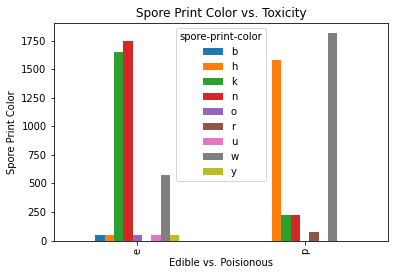

In [39]:
pd.crosstab(df['class'],[df['spore-print-color']]).plot(kind='bar')
plt.xlabel('Edible vs. Poisionous')
plt.ylabel('Spore Print Color')
plt.title('Spore Print Color vs. Toxicity')

Text(0.5, 1.0, 'Odor vs. Toxicity')

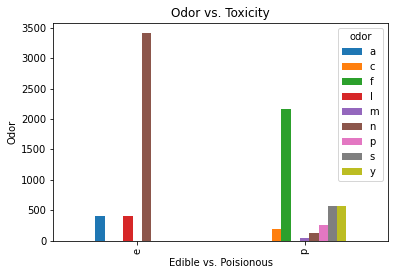

In [40]:
pd.crosstab(df['class'],[df['odor']]).plot(kind='bar')
plt.xlabel('Edible vs. Poisionous')
plt.ylabel('Odor')
plt.title('Odor vs. Toxicity')

Text(0.5, 1.0, 'Cap Color vs. Toxcity')

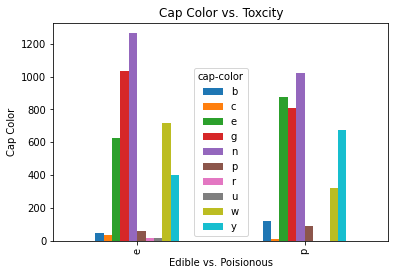

In [41]:
pd.crosstab(df['class'],[df['cap-color']]).plot(kind='bar')
plt.xlabel('Edible vs. Poisionous')
plt.ylabel('Cap Color')
plt.title('Cap Color vs. Toxcity')